In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [6]:
df = pd.read_csv('mouse_viral_study.csv')

In [8]:
df.head(10)

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
5,2.158224,2.745451,1
6,8.172223,7.328995,0
7,8.719652,6.228618,0
8,6.779079,6.630667,0
9,3.043633,4.642650,1


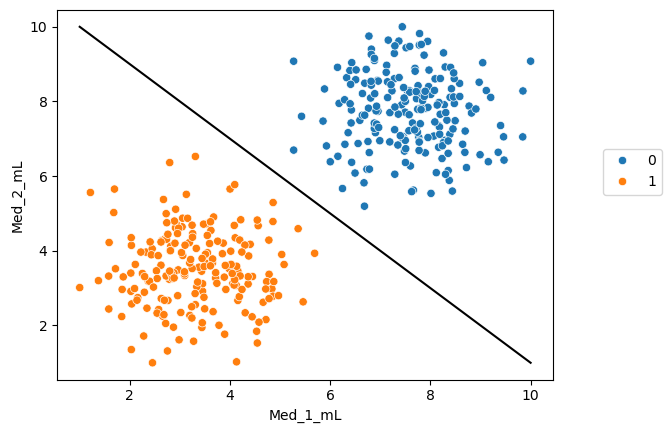

In [20]:
sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', data = df, hue = 'Virus Present')

# Построим линию разделения 

x = np.linspace(1, 10, 100)
m = -1
b = 11
y = m * x + b

plt.plot(x, y, color = 'black')
plt.legend(loc=(1.1,0.5))

In [26]:
X = df.drop('Virus Present', axis = 1)
y = df['Virus Present']

In [32]:
from sklearn.svm import SVC

In [34]:
model = SVC(kernel = 'linear', C = 1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [36]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


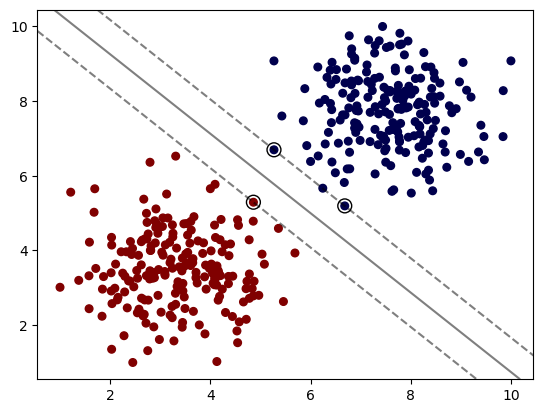

In [40]:
plot_svm_boundary(model, X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


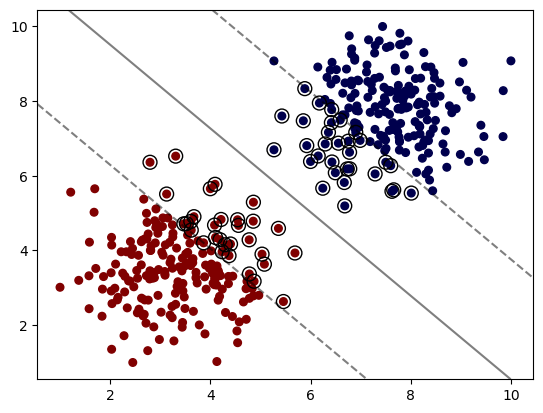

In [42]:
model = SVC(kernel = 'linear', C = 0.005)
model.fit(X, y)
plot_svm_boundary(model, X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


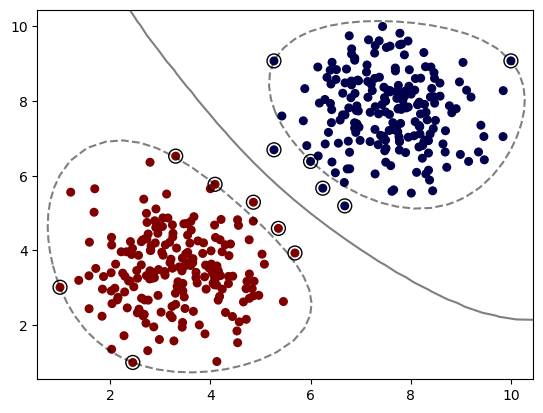

In [44]:
model = SVC(kernel = 'rbf', C = 1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


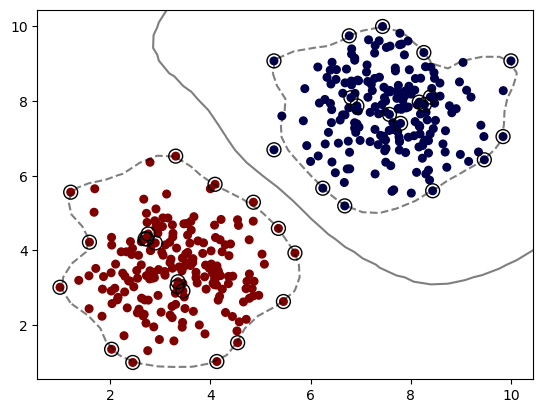

In [52]:
model = SVC(kernel = 'rbf', C = 1, gamma = 0.5)
model.fit(X, y)
plot_svm_boundary(model, X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


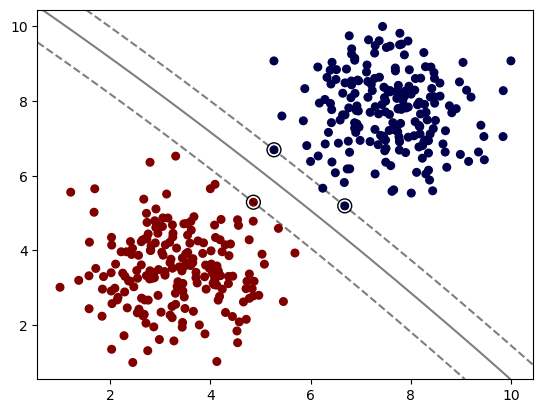

In [54]:
model = SVC(kernel = 'poly', C = 1, degree = 3)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [56]:
from sklearn.model_selection import GridSearchCV

In [58]:
model = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid_model = GridSearchCV(model, param_grid)

grid_model.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [60]:
grid_model.best_params_

{'C': 0.01, 'kernel': 'linear'}